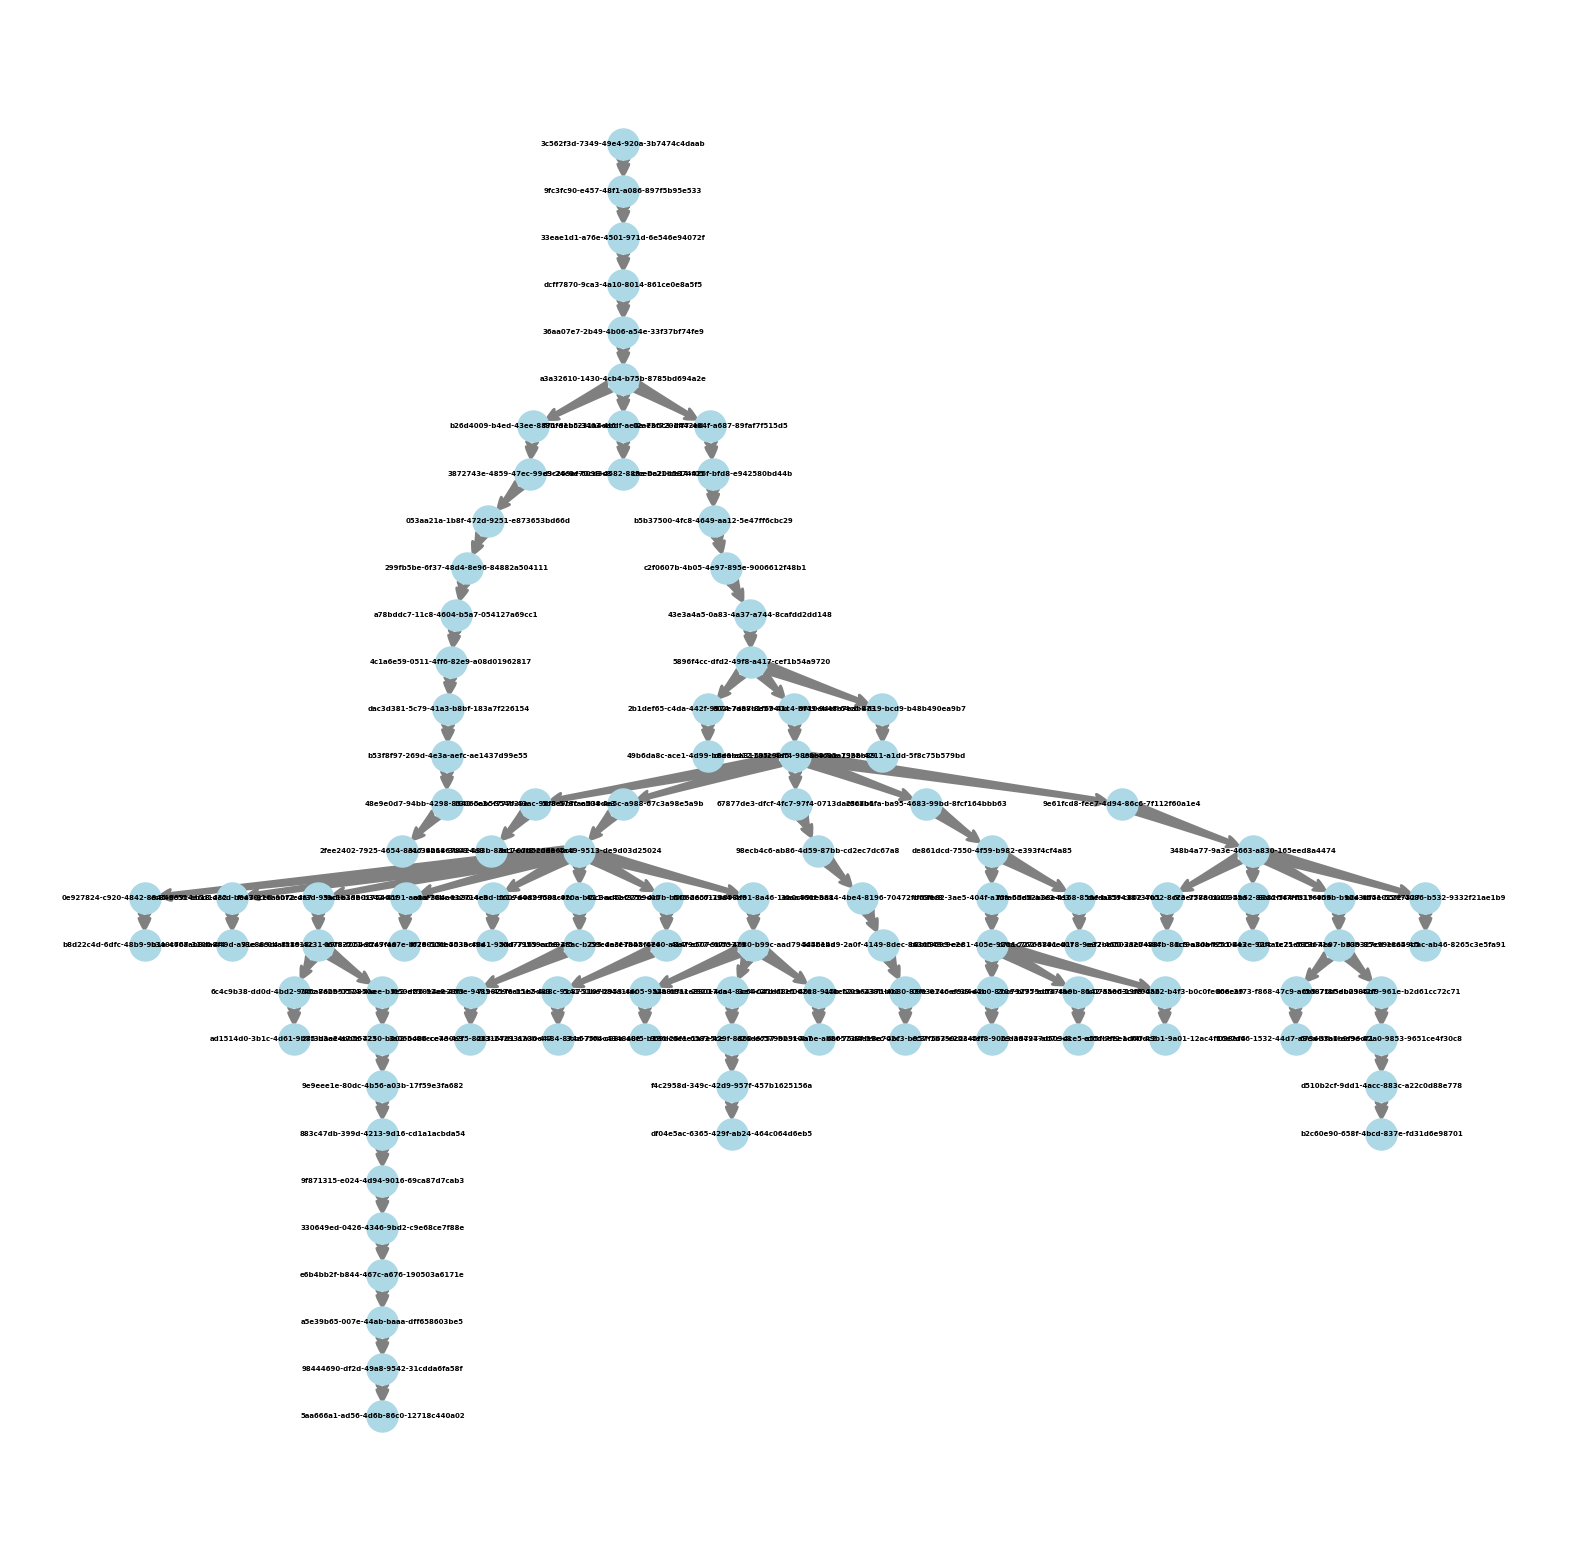

In [16]:
import json
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt

def pretty_print_keys(json_obj, indent=0):
    """
    Recursively pretty prints the keys of a JSON object.
    """
    if isinstance(json_obj, dict):
        for key in json_obj.keys():
            print(' ' * indent + key)
            pretty_print_keys(json_obj[key], indent=indent+4)
    elif isinstance(json_obj, list):
        print(' ' * indent + '[')
        for item in json_obj:
            print(' ' * indent + item)
        print(' ' * indent + ']')
        
def draw_conversation_graph(conversation):
    """
    Draws a conversation graph using the networkx library.
    """
    G = nx.DiGraph()

    # Add nodes
    for node_id in conversation['mapping']:
        G.add_node(node_id)

    # Add edges
    for node_id, node_data in conversation['mapping'].items():
        for child_id in node_data.get('children', []):
            G.add_edge(node_id, child_id)

    # Draw graph
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot', args='-Grankdir=TB')
    fig, ax = plt.subplots(figsize=(20, 20))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=5, font_weight='bold', \
            arrowsize=20, arrowstyle='fancy', width=2, edge_color='grey')
    edge_labels = { (u,v): '' for u,v in G.edges() }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.7, font_color='red')

    plt.show()

def print_titles(conversations):
    """
    Prints the titles of all conversations.
    """
    for index, conversation in enumerate(conversations):
        string = '[{}, {}]'.format(index, conversation['title']).strip()
        print(string, end=', ')

# read conversations.json
conversations = None
#

with open('conversations.json') as f:
    conversations = json.load(f)

#print_titles(conversations)
#pretty_print_keys(conversations[0])
draw_conversation_graph(conversations[3])